# Creating an application from an AI model

### Imports

In [48]:
import os
from fastcore.all import *
from fastai.vision.all import * 
from fastai.learner import load_learner
from fastai.vision.widgets import *

Là on upload le modèle précédemment entraîné : 

In [49]:
path = path = Path('models') 
learn_inf = load_learner(path/'first_classifier.pkl')

On fait un bouton pour uplaoder un fichier : 

In [50]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [51]:
#hide
# For the notebook, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['primrose.jpg'])

In [52]:
img = PILImage.create(btn_upload.data[-1])

widget Output to dispay image : 

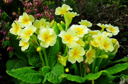

Output()

In [53]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [54]:
pred,pred_idx,probs = learn_inf.predict(img)

In [55]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: primrose; Probability: 1.0000')

Bouton classification : 

In [56]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Fonction appelée quand on clique sur le bouton : 

In [57]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [58]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [59]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])